In [1]:
# important modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import cm
from Module import Module as md

In [2]:
img, binary=md.load_image('./images/p309.png')
binary=md.de_skew(binary,10)
# binary=md.get_img_rot_broa(binary,10)
if binary is None:exit(1)
spectrum=md.magnitude_spectrum(binary)
# spectrum=cv2.bitwise_not(spectrum)


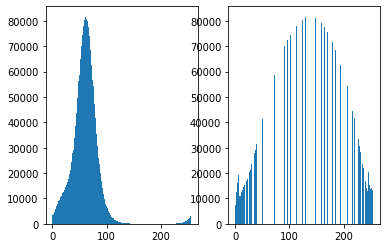

In [3]:

#采用直方图二值化
hist = cv2.equalizeHist(spectrum)
# hist = cv2.equalizeHist(binary)

plt.subplot(121)
plt.hist(spectrum.ravel(), 256)
plt.subplot(122)
plt.hist(hist.ravel(), 256)
plt.show()


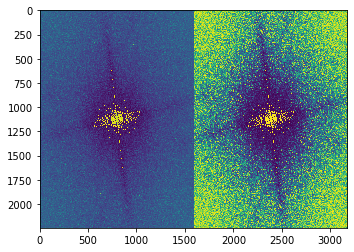

In [4]:
# 第四步：使用cv2.imshow()绘值均衡化的图像
mdata=np.hstack((spectrum, hist))
# mdata=np.hstack((binary, hist))
plt.imshow( mdata)

In [5]:
ret, data = cv2.threshold(hist, 210, 255,cv2.THRESH_BINARY)
# data=cv2.flip(data,1,dst=None) 
#边缘检测：参数分别是（源灰度图，低阈值，高阈值）
edge = cv2.Canny(spectrum,150,200)

# lmd=0.1
# ave= lmd*data+(1.0-lmd)*edge
ave= data&edge

#检测直线：返回直线角度列表、权重列表、顶点列表。其中xxyys[*]=([x[0],x[1]],[y[0],y[1]])
line_angles,weights,xxyys=md.hough_lines(edge)
for i in range(min(len(line_angles),10)):
    print(line_angles[i],weights[i],xxyys[i])

-96.53631284916202 524 (array([921.16242017, 663.93557164]), array([2245.,    0.]))
84.46927374301676 334 (array([692.85084573, 910.2349201 ]), array([   0., 2245.]))
-95.53072625698324 332 (array([895.1620228 , 677.77794843]), array([2245.,    0.]))
82.45810055865921 320 (array([652.26017524, 949.49037934]), array([   0., 2245.]))
-97.54189944134077 315 (array([934.35673258, 637.12652849]), array([2245.,    0.]))
85.47486033519553 273 (array([717.86784339, 895.54434927]), array([   0., 2245.]))
-98.54748603351956 265 (array([952.86632734, 615.44640674]), array([2245.,    0.]))


Text(0.5, 1.0, 'ave')

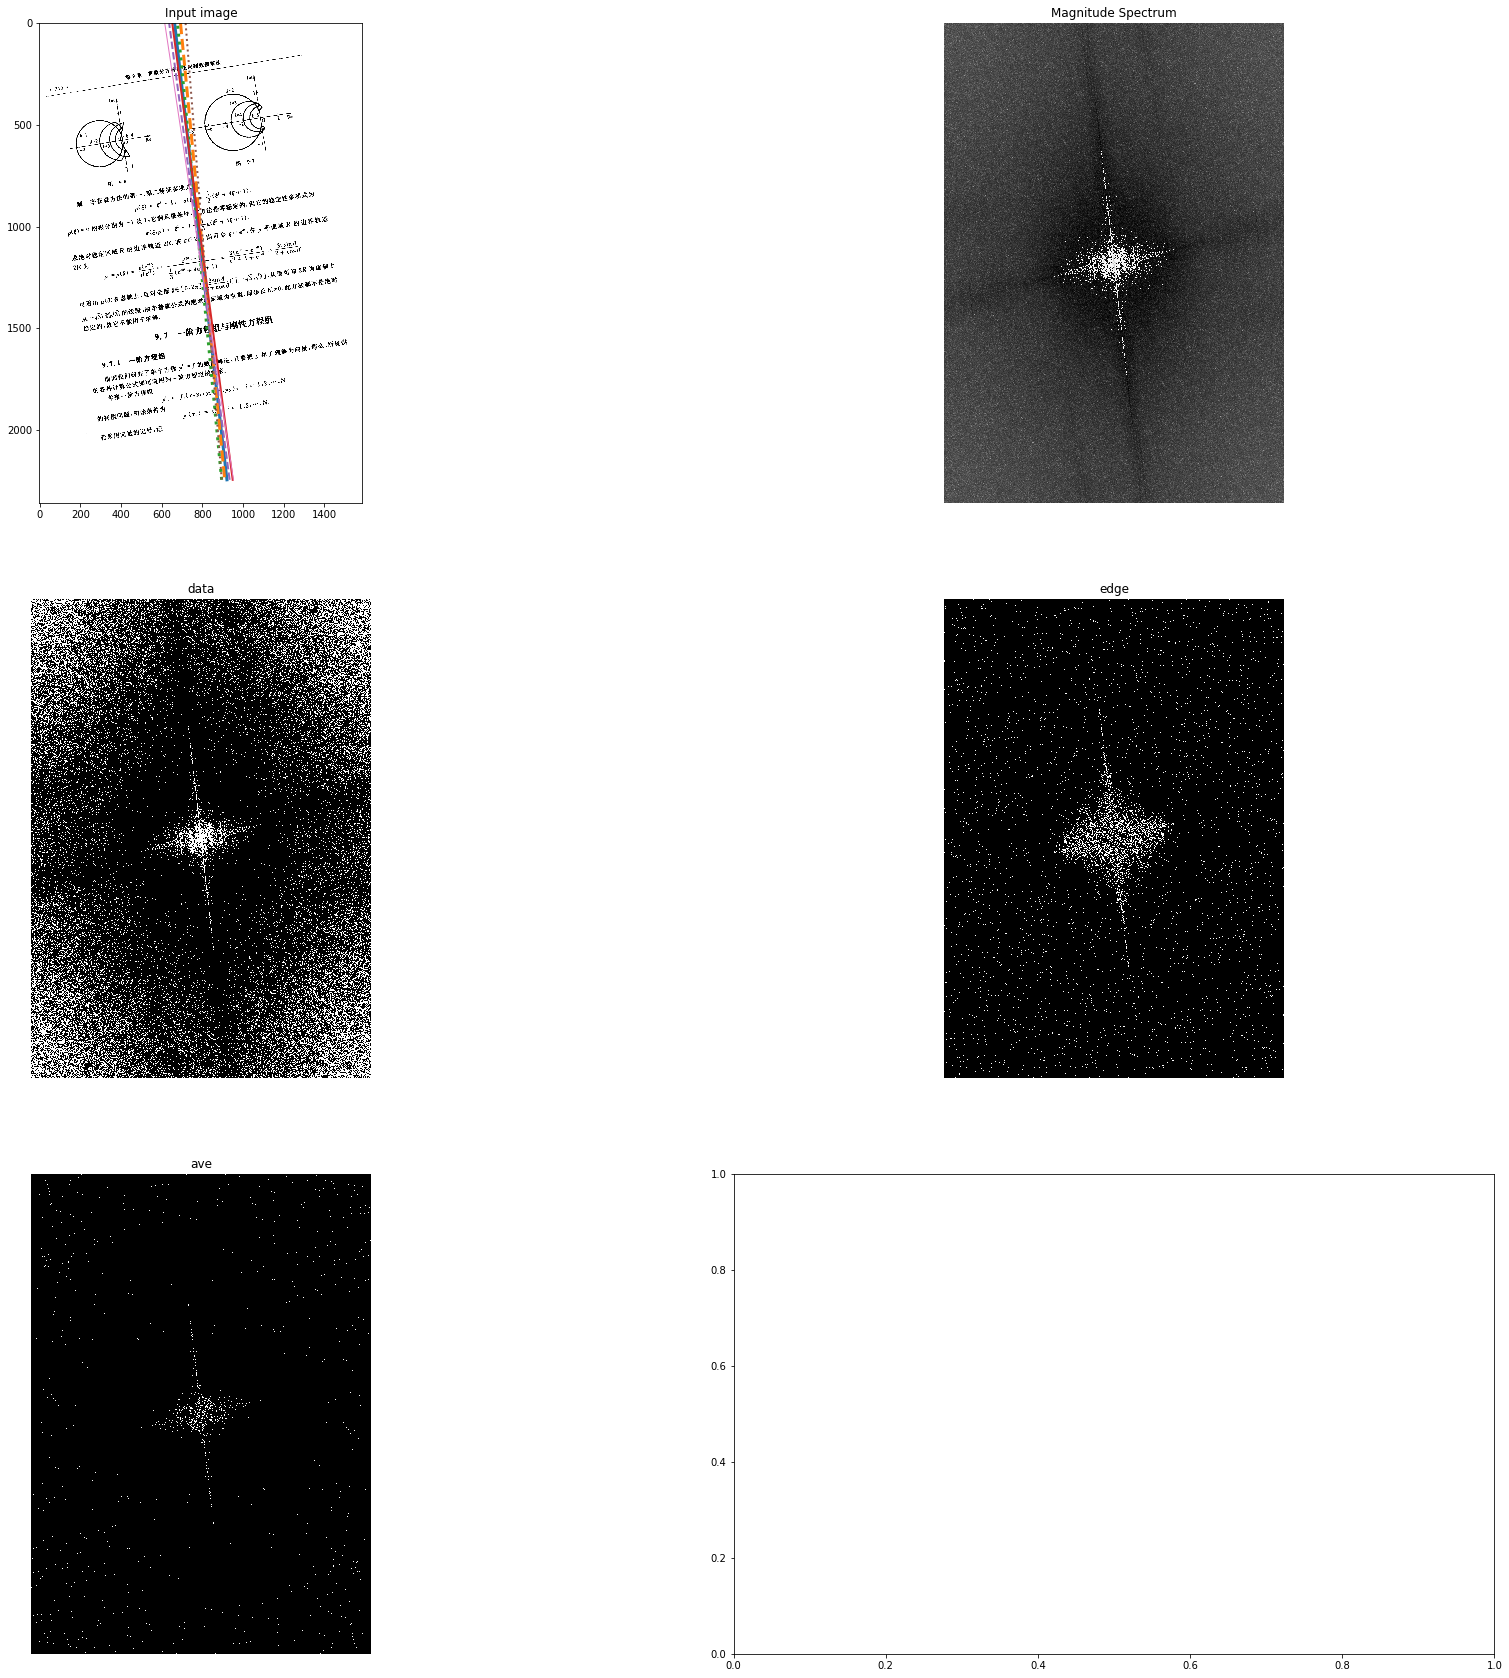

In [6]:
# Generate figures to visualize steps in fourier transform and hough line detection
fig, axes = plt.subplots(3,2, figsize=(30, 30))
ax = axes.ravel()
#view the input image
ax[0].imshow(binary , cmap=cm.gray)
ax[0].set_title('Input image')
# ax[0].set_axis_off()
# ax[0].axis([0,binary.shape[1],0,binary.shape[0]])
# help(ax[0].axis)
md().show_lines(ax[0],weights,xxyys)
# ax[0].set(xlim=(0,binary.shape[1]),ylim=(0,binary.shape[0]))

# view the magnitude_spectrum after fourier transform
ax[1].imshow(spectrum, cmap=cm.gray)
ax[1].set_axis_off()
# ax[1].axis([0,binary.shape[1],0,binary.shape[0]])
ax[1].set_title('Magnitude Spectrum')
# md().show_lines(ax[1],weights,xxyys)

# view the data after fourier transform
ax[2].imshow(data, cmap=cm.gray)
ax[2].set_axis_off()
ax[2].set_title('data')

# view the edge after fourier transform
ax[3].imshow(edge, cmap=cm.gray)
ax[3].set_axis_off()
ax[3].set_title('edge')

# view the ave after fourier transform
ax[4].imshow(ave, cmap=cm.gray)
ax[4].set_axis_off()
ax[4].set_title('ave')